### importing padas library

In [69]:
import pandas as pd


### check pandas version

In [70]:
print('Pandas version ' + pd.__version__)

Pandas version 0.23.4


### Create Data Sets

In [71]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

### Merge Data Sets - ZIP



In [72]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

### Create Data Frame


In [73]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### Export the dataframe to a csv file -  df.to_csv


In [74]:
df.to_csv('births.csv',index=False,header=False)

In [ ]:
#The function to_csv will be used to export the file. 
#The file will be saved in the same location of the notebook unless specified otherwise.

In [ ]:
#The only parameters we will use is index and header. 
#Setting these parameters to False will prevent the index and header names from being exported. 
#Change the values of these parameters to get a better understanding of their use.

### Get Data from csv - read_csv

In [75]:
Location = r'C:\Users\Admin\births.csv'

In [76]:
df = pd.read_csv(Location)
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [77]:
# just location gives you df with or with out valid headers

In [78]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [79]:
# setting header to none makes df not to takes data as headers

In [80]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [81]:
# setting user defined names to headers of df

In [82]:
#numbers [0,1,2,3,4] as the row numbers in an Excel file. 
#In pandas these are part of the index of the dataframe. 
#index is like the primary key of a sql table with the exception that an index is allowed to have duplicates.
#[Names, Births] can be though of as column headers 

### Delete File in the specified location

In [83]:
import os
os.remove(Location)

In [84]:
# Check data type of the columns

In [85]:
df.dtypes

Names     object
Births     int64
dtype: object

In [86]:
# Check data type of Births column

In [87]:
df.Births.dtype

dtype('int64')

### Analyze Data

In [88]:
#To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

#1) Sort the dataframe and select the top row
#or
#2) Use the max() attribute to find the maximum value

In [89]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [90]:
# To get top two names
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(2)

,Names,Births
4,Mel,973
0,Bob,968


In [91]:
# Method 2:
df['Births'].max()

973

In [92]:
# Method 2 Modified 
df[df['Births'] == df['Births'].max()]

,Names,Births
4,Mel,973


In [93]:
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [94]:
df['Births']

0    968
1    155
2     77
3    578
4    973
Name: Births, dtype: int64

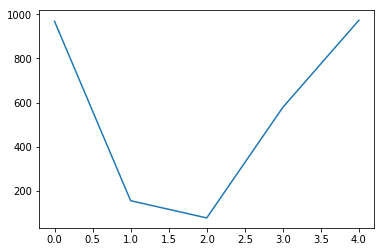

In [95]:
import matplotlib.pyplot as plt
df['Births'].plot()

In [96]:
# Maximum value in the data set
MaxValue = df['Births'].max()
MaxValue

973

In [97]:
# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values
MaxName

array(['Mel'], dtype=object)

In [98]:
# Display both together
Text = str(MaxValue) + " - " + MaxName
Text

array(['973 - Mel'], dtype=object)

### Graph Plot with value and name 

Text(8,0,"['973 - Mel']")

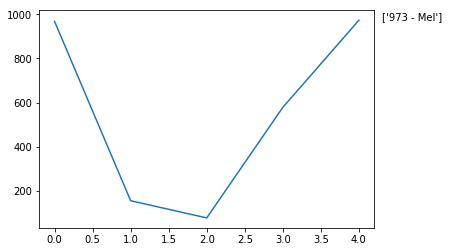

In [99]:
# Create graph
df['Births'].plot()

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')